![Film Studio.png](images/Film%20Studio.png)

# **Box Office Alchemy: Unlocking Movie Success Strategies for Microsoft's New Studio**




**Author:** Colins Ngige Wanjao



**Email:** colins.wanjao@student.moringaschool.com
***

## Executive Summary

This project addresses the strategic entry of Microsoft into the film industry by analyzing historical box office data and audience preferences. The business problem involves optimizing Microsoft's movie production strategy to ensure commercial success. Using a diverse dataset including movie genres, ratings, and revenue figures, a multifaceted approach was employed to extract insights. The results highlight that genres like Adventure, Action, Drama, Comedy, and Animation tend to perform exceptionally well at the box office, providing valuable direction for Microsoft's genre strategy. Additionally, the project suggests a focus on content diversification and a preference for quality storytelling over runtime constraints. In an ever-evolving industry, continuous market research and adaptability are vital. These findings position Microsoft to make informed decisions and succeed in its cinematic venture.

## Business Problem

The core business problem at hand pertains to Microsoft's ambitious foray into the movie industry with the establishment of a new movie studio. The critical pain points that the company is grappling with include the lack of expertise and experience in the movie-making domain. Microsoft is faced with uncertainties regarding what types of films are currently thriving at the box office and how to translate these insights into actionable recommendations for their new movie studio. 

In light of these challenges, the chosen data analysis questions aim to address the following critical aspects:

1. **Which movie genres are currently most successful at the box office?**
   - The business is interested in understanding the most lucrative genres to guide its movie production strategy.

2. **How do audience ratings correlate with box office performance across different genres?**
   - By examining the relationship between ratings and box office gross, the business can gauge the impact of audience preferences on financial success.

3. **What are the trends in box office performance over time for various genres?**
   - Recognizing the evolution of genre popularity and performance over time is crucial for making informed business decisions.

These questions are indispensable from a business perspective as they provide Microsoft's new movie studio with the essential insights required to strategically enter the competitive movie industry. By addressing these questions, the company can identify profitable genres, tailor their content to align with audience preferences, and adapt to shifting market trends. Ultimately, these insights are invaluable for ensuring that Microsoft's new movie studio can make informed decisions and increase its chances of success in this dynamic and ever-evolving sector.

## Data Understanding

The datasets for this project are sourced from for main datasets: `imdb.title.basics`, `imdb.title.ratings`,`bom.movie.gross`, and `tmdb.movies.gross`. These datasets have been carefully chosen because they are integral to addressing the data analysis questions at hand.

1. **imdb.title.basics:**
   - This dataset provides information about movies, including titles and genres. Genres are particularly significant as they are central to the analysis of which movie genres are performing well at the box office.

2. **imdb.title.ratings:**
   - This dataset includes data on IMDb ratings for movies. These ratings are crucial for understanding audience preferences and examining their relationship with box office performance.

3. **bom.movie.gross:**
   - This dataset contains information about the financial aspects of movies, including box office gross. Box office gross serves as a key variable to evaluate movie performance in financial terms.

4. **tmdb.movie.gross:**
   - This dataset contains a fusion of movie data from the "title.basics" and "title.ratings" CSV files, serving as a supplementary information source to address potential gaps in the initial datasets if needed.

The sample within these datasets encompasses a broad range of movies spanning different genres, release years, and production scales. The variables of interest primarily include:
- **Title:** The title of the movie, which is a common identifier across the datasets.
- **Genres:** Categorical variables that represent the genres to which a movie belongs, facilitating genre-specific analysis.
- **IMDb Ratings:** Numerical variables indicating audience ratings, which are essential for understanding audience satisfaction and preferences.
- **Box Office Gross:** Numerical variables representing the financial success of movies, serving as a key metric to evaluate box office performance.

These four datasets will be used in tandem to answer the data analysis questions and provide actionable insights for Microsoft's new movie studio.

## Data Preparation

### Data Loading & Inspection

In [1152]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1153]:
# importing the selected CSV files 
title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [1154]:
# checking out the metadata of the title_basics_df
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [1155]:
#inspecting the first 5 records in the title_basics_df:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This dataset contains information about movies, including their titles, genres, release years, and more.

Key columns:
- `tconst`: A unique identifier for each movie.
- `primary_title`: The primary title of the movie, typically in the language and format most commonly used for marketing and distribution.
- `original_title`: The original title of the movie, which may be in a different language or format.
- `start_year`: The year in which the movie was released.
- `genres`: The genres to which the movie belongs.

From our range index, we have 146,144 rows in the title_basics_df. Taking a look at the metadata of our DataFrame, we can spot a total of 6 columns with 3 of them having some null values (`original_title`, `runtime_minutes` & `genres`). Columns  `tconst`, `primary_title` and `start_year` have all their values intact.
It is worth noting that the DataFrame's columns essentially have values of 3 Datatypes (Dtypes).

- `object`: Columns `tconst` ,  `primary_title` `original_title` are  `genres` are of object type. This is equivalent to python's string dtype.
- `int64`: Column `start_year` is the only one that stores values in this dtype.
- `float64`: Column `runtime_minutes` is of floating-point type.



In [1156]:
# checking out the metadata of the title_ratings_df
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [1157]:
#printing the first 5 rows of in the title_ratings_df
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This dataset provides information on movie ratings, including IMDb ratings and the number of votes.

Key columns:
- `tconst`: A unique identifier that links to the imdb.title.basics dataset.
- `averagerating`: The average rating of the movie on IMDb.
- `numvotes`: The number of votes contributing to the average rating.
Valuable for assessing audience reception and rating data for movies.


Reading the medatadata of our title_ratings_df we note that the DataFrame Object has 3 columns and 73,856 rows. All three columns each have 73,856 non-null values. This greatly simplifies the data cleaning process!
Data Types associated with these columns are as follows:

-  `Object`: column  `tconst` is of object data type, again, equivalent to python's string
-  `int64` : column  `numvotes` is of integer dtype. Finally,
-  `float64` : columns  `averagerating` is of float type.

In [1158]:
# checking out the metadata of the bom_movie_gross_df
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [1159]:
# inspecting the first five rows of the bom_movie_gross
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


This dataset contains data related to the financial aspects of movies, including domestic and foreign gross earnings and release dates.
Key columns:
- `title`: The movie title, which can be linked to the imdb.title.basics dataset.
- `domestic_gross`: The domestic (U.S.) box office gross earnings.
- `foreign_gross`: The foreign box office gross earnings.
- `year`: The year of release.

Helpful for evaluating the financial performance of movies.


The rangeindex for this DataFrame indicates that it contains 3387 rows of data, whereas the number of columns are 5.
A total of 3 columns have some missing/NaN values namely:  `studio`, `domestic_gross` & `foreign_gross`.
Data Types associated with each column in this DataFrame are as follows:

-  `object`:  `title`, `studio` & `foreign_gross` store values as object dtype, equivalent to python's string. It appears that we might have to change the dtype for  `foreign_gross` to a more appropriate one.
-  `int64`:  `year` column has integer values. We will have to adjust this to a datetime object.
-  `float64`:  `domestic_gross` column stores values as float type (decimal numbers)


### Data Cleaning

In [1160]:
# Checking again the columns with missing values in our title_basics DataFrame
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [1161]:
# Calculating the percentage of missing values per column with respect to the entire DF using a function
def missing_values(data):
    """A simple function to identify data with missing values"""
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are NOT missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

# applying our function to the title_basics_df
missing_data = missing_values(title_basics_df)
missing_data

,index,Missing Values,Percentage
0,runtime_minutes,31739,0.217176
1,genres,5408,0.037005
2,original_title,21,0.000144


In [1162]:
# Missing values in the genres and original_title columns are few. We can safely drop them from our table,
#without greatly affecting our analysis.

#filtering our df to only contain non null/ empty strings 
missing_genres = title_basics_df.genres.isna()
title_basics_df = title_basics_df[~missing_genres]

In [1163]:
# Running our function again to confirm that all null values in the genre column have been dropped.
missing_values(title_basics_df)

,index,Missing Values,Percentage
0,runtime_minutes,28503,0.202528
1,original_title,2,0.000014


In [1164]:
# Doing the same for the original_title column with only 2 missing values
missing_title = title_basics_df.original_title.isna()
title_basics_df = title_basics_df[~missing_title]

#confirming the operation was successful
missing_values(title_basics_df)

,index,Missing Values,Percentage
0,runtime_minutes,28502,0.202524


Given the goal of creating successful films and the potential significance of runtime in understanding movie success, it is advisable to use imputation for handling missing runtime minutes. The choice between mean and median imputation depends on the distribution of the available data:

`#Mean Imputation:`

Mean imputation if the distribution of runtime minutes is approximately symmetric and not heavily skewed. 
It provides the most accurate estimate of the central tendency.

`#Median Imputation:`

If the distribution of runtime minutes is skewed or contains outliers, median imputation is a robust choice. It is less sensitive to extreme values.

minimum runtime: 1.0
Maximum runtime: 51420.0
Mean runtime: 86.26155641884668


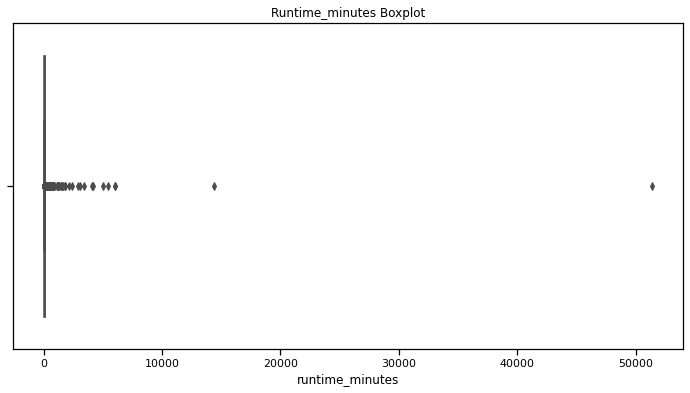

In [1165]:
# Visualizing distribution of runtime minutes in our DataFrame
runtimes = title_basics_df.runtime_minutes

# getting the minimum and maximum values in our runtime_minutes col

min_runtime = runtimes.min()
max_runtime = runtimes.max()
mean_runtime = runtimes.mean()
print(f"minimum runtime: {min_runtime}")
print(f"Maximum runtime: {max_runtime}")
print(f"Mean runtime: {mean_runtime}")

# selecting the column for the boxplot
col_data = title_basics_df.runtime_minutes

# Creating boxplot using Seaborn Library
plt.figure(figsize=(12,6))
sns.set_context('notebook')
sns.boxplot(x= col_data, color= "blue")
plt.title('Runtime_minutes Boxplot');


In [1166]:
# checking to see which movie has the highest runtime just for fun
title_basics_df.loc[title_basics_df.runtime_minutes == max_runtime]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary


The data within the "runtime_minutes" column exhibits a substantial skew, as evident from the distribution. Notably, the 25th, 75th percentiles, as well as the median, are situated towards the left side of the plot. Our dataset includes a movie with an extraordinary runtime of 51,420 minutes, equivalent to approximately 38 days, making it the longest film ever created (more details can be found in this [Wiki Page](https://en.wikipedia.org/wiki/Logistics_(film))). Given the asymmetric nature of the data, it is advisable to impute missing values using the `median` value for this column.


In [1167]:
# imputing missing values with the median runtime
title_basics_df.runtime_minutes.fillna(title_basics_df.runtime_minutes.median(), inplace=True)

In [1168]:
# Checing our DataFrame for any residual columns with missing values & watching out for duplicates
print(missing_values(title_basics_df))
duplicate_rows = title_basics_df.duplicated().sum()
print(f"Num of Duplicated Rows: {duplicate_rows}")


Empty DataFrame
Columns: [index, Missing Values, Percentage]
Index: []
Num of Duplicated Rows: 0


In [1169]:
# Repeating similar steps for our bom.movie.df, since our second DataFrame doesn't have any missing values

# Calculating the percentage of missing values per column with respect to the entire DF using our handy function

missing_data = missing_values(bom_movie_gross_df)
missing_data

,index,Missing Values,Percentage
0,foreign_gross,1350,0.398583
1,domestic_gross,28,0.008267
2,studio,5,0.001476


In [1170]:
# Filtering the Df to remove all the rows that have missing values in the studio column
missing_studios = bom_movie_gross_df.studio.isna()
bom_movie_gross_df = bom_movie_gross_df[~missing_studios]

In [1171]:
# Verifying that the operation was successful
missing_values(bom_movie_gross_df)

,index,Missing Values,Percentage
0,foreign_gross,1349,0.398876
1,domestic_gross,26,0.007688


In [1172]:
#Attempting to convert the dtype of the foreign_gross column from object to float64 throws an error
#This phenomenon happens when there are some characters that inhibits this change, and in this case, it is
#the comma (,) character

#removing the , character from foreign_gross column

bom_movie_gross_df.foreign_gross.replace(',', '', inplace=True, regex=True)

In [1173]:
bom_movie_gross_df.foreign_gross = bom_movie_gross_df.foreign_gross.astype('float64')

#Confirming that dtype has successfully changed from object to float64

bom_movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

minimum runtime: 600.0
Maximum runtime: 960500000.0
Mean runtime: 74954901.2673389


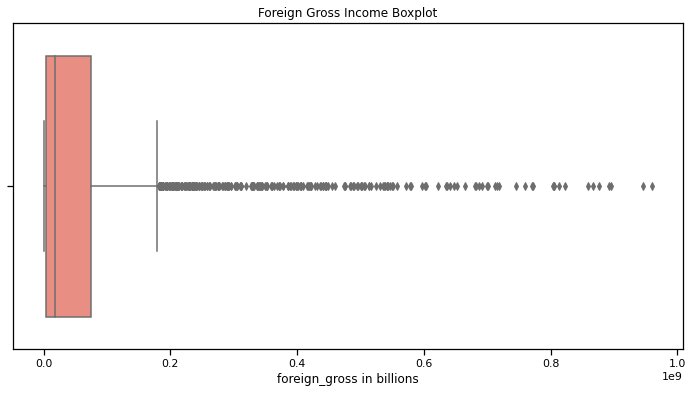

In [1174]:
# Visualizing distribution of foreign_gross in our DataFrame
income_foreign = bom_movie_gross_df.foreign_gross

# getting the minimum and maximum values in our runtime_minutes col

min_foreign = income_foreign.min()
max_foreign = income_foreign.max()
mean_foreign = income_foreign.mean()
print(f"minimum runtime: {min_foreign}")
print(f"Maximum runtime: {max_foreign}")
print(f"Mean runtime: {mean_foreign}")

# selecting the column for the boxplot
col_data = bom_movie_gross_df.foreign_gross

# Creating boxplot using Seaborn Library
plt.figure(figsize= (12,6))
sns.boxplot(x= col_data, color= "salmon")
plt.title('Foreign Gross Income Boxplot')
plt.xlabel('foreign_gross in billions');

In [1175]:
# Imputing with the median value since our data is skewed
bom_movie_gross_df.foreign_gross.fillna(bom_movie_gross_df.foreign_gross.isna().median(), inplace=True)

#Verifying that the operation was successful by calling the `missing_values` function
missing_values(bom_movie_gross_df)

,index,Missing Values,Percentage
0,domestic_gross,26,0.007688


minimum runtime: 100.0
Maximum runtime: 936700000.0
Mean runtime: 28771489.56495828


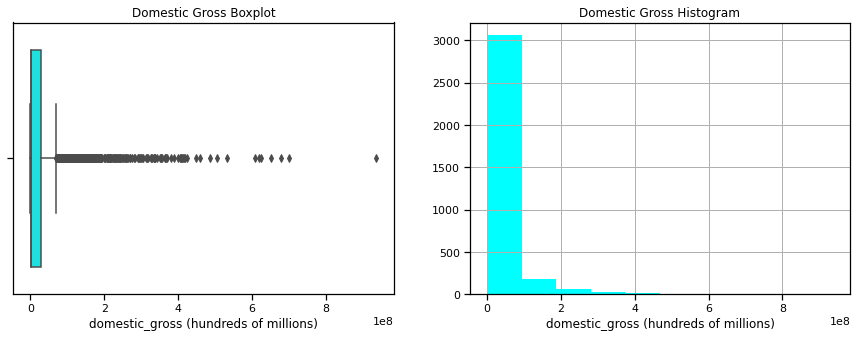

In [1176]:
# Visualizing distribution of domestic_gross in our DataFrame
income_domestic = bom_movie_gross_df.domestic_gross

# getting the minimum and maximum values in our runtime_minutes col

min_domestic = income_domestic.min()
max_domestic = income_domestic.max()
mean_domestic = income_domestic.mean()
print(f"minimum runtime: {min_domestic}")
print(f"Maximum runtime: {max_domestic}")
print(f"Mean runtime: {mean_domestic}")

# selecting the column for the boxplot
col_data = bom_movie_gross_df.domestic_gross

# Creating boxplot & histogram using Seaborn Library
fig, ax = plt.subplots(ncols=2, nrows=1, figsize= (15,5))
sns.boxplot(x=col_data, ax=ax[0], color='cyan')
ax[0].set_title('Domestic Gross Boxplot')
ax[0].set_xlabel('domestic_gross (hundreds of millions)')
bom_movie_gross_df.domestic_gross.hist(ax=ax[1], color='cyan')
ax[1].set_title('Domestic Gross Histogram')
ax[1].set_xlabel('domestic_gross (hundreds of millions)')
plt.tight_layout;

In [1177]:
# Imputing with the median value since our data is skewed
bom_movie_gross_df.domestic_gross.fillna(bom_movie_gross_df.domestic_gross.isna().median(), inplace=True)

#Verifying that the operation was successful by calling the `missing_values` function & checking for any instances of duplicates
print(f"Num of duplicates: {bom_movie_gross_df.duplicated().sum()}")
print(missing_values(bom_movie_gross_df))

Num of duplicates: 0
Empty DataFrame
Columns: [index, Missing Values, Percentage]
Index: []


## Data Integration & Feature Engineering

In [1178]:
# Merge the 'bom.movie_gross' dataset with 'imdb.title.basics' and 'imdb.title.ratings' using 'title' as the merge key
# Opted to choose a left join operation so as to preserve the box office data which is integral for analysis of finacial 
# performance across different genres
combined_data = bom_movie_gross_df.merge(title_basics_df, left_on='title', right_on='original_title', how='left')
combined_data = combined_data.merge(title_ratings_df, left_on='tconst', right_on='tconst', how='left')
combined_data.head()


,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0


In [1179]:
missing_values(combined_data)

,index,Missing Values,Percentage
0,numvotes,1520,0.383838
1,averagerating,1520,0.383838
2,genres,1223,0.308838
3,runtime_minutes,1223,0.308838
4,start_year,1223,0.308838
5,original_title,1223,0.308838
6,primary_title,1223,0.308838
7,tconst,1223,0.308838


In [1180]:
# Removing the primary_title, tconst, and original_title columns in our combined_df, 
# since the title column in the merged df will suffice
cols_to_drop = ['primary_title', 'tconst', 'original_title']
combined_data.drop(columns=cols_to_drop, axis=1, inplace=True)
#Confirming the operation was successful
print(combined_data.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [1181]:
combined_data.dtypes

title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
start_year         float64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
dtype: object

In [1182]:
combined_data.shape

(3960, 10)

In [1183]:
#We shall attempt to look for additional data to fill null values in num_votes and vote_average from an external dataset

#loading the tmdb_movies_df dataset

tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [1184]:
tmdb_movies_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [1185]:
#Extracting only the columns that we need and reassigning them to our tmdb_movies variable
tmdb_movies_df = tmdb_movies_df.loc[:, ['original_title', 'vote_average', 'vote_count', 'release_date']]
tmdb_movies_df.head()


,original_title,vote_average,vote_count,release_date
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010-11-19
1,How to Train Your Dragon,7.7,7610,2010-03-26
2,Iron Man 2,6.8,12368,2010-05-07
3,Toy Story,7.9,10174,1995-11-22
4,Inception,8.3,22186,2010-07-16


In [1186]:
#creating a new column for release_year to replace release_date
tmdb_movies_df['release_year'] = tmdb_movies_df.release_date.apply(lambda x: x.split('-')[0])
#Dropping the release_date column
tmdb_movies_df.drop('release_date', axis=1, inplace=True)
tmdb_movies_df.head(2)


,original_title,vote_average,vote_count,release_year
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,How to Train Your Dragon,7.7,7610,2010


In [1187]:
#Executing an inner join to preserve only the movies appearing in both Tables

combined_data = combined_data.merge(tmdb_movies_df, left_on= 'title', right_on= 'original_title', how="inner")
combined_data.head(5)

,title,studio,domestic_gross,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,original_title,vote_average,vote_count,release_year
0,Toy Story 3,BV,415000000.0,652000000.0,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Toy Story 3,7.7,8340,2010
1,Inception,WB,292600000.0,535700000.0,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Inception,8.3,22186,2010
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Shrek Forever After,6.1,3843,2010
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,The Twilight Saga: Eclipse,6.0,4909,2010
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,Iron Man 2,6.8,12368,2010


In [1188]:
missing_values(combined_data)

,index,Missing Values,Percentage
0,numvotes,443,0.141669
1,averagerating,443,0.141669
2,genres,84,0.026863
3,runtime_minutes,84,0.026863
4,start_year,84,0.026863


In [1189]:
#right off the bat, we can polish our combined dataset by removing redundant columns
combined_data.drop('start_year', inplace=True, axis=1)

#filling in missing values in the averagerating column with values from vote_average col
combined_data.averagerating.fillna(combined_data.vote_average, inplace=True)

#Finally dropping the vote_average col
combined_data.drop('vote_average', axis=1, inplace=True)

#Since there is a huge discrepancy between num_votes and vote_counts columns for the same movie titles, 
#it may not be an appropriate strategy to impute values from the latter.
#The vote_counts column will be dropped and null values within num_votes will 
# be filled using another appropriate method

combined_data.drop('vote_count', inplace=True, axis=1)

#confirming our changes
combined_data.head(2)


,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,original_title,release_year
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Toy Story 3,2010
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Inception,2010


In [1190]:
missing_values(combined_data)

,index,Missing Values,Percentage
0,numvotes,443,0.141669
1,genres,84,0.026863
2,runtime_minutes,84,0.026863


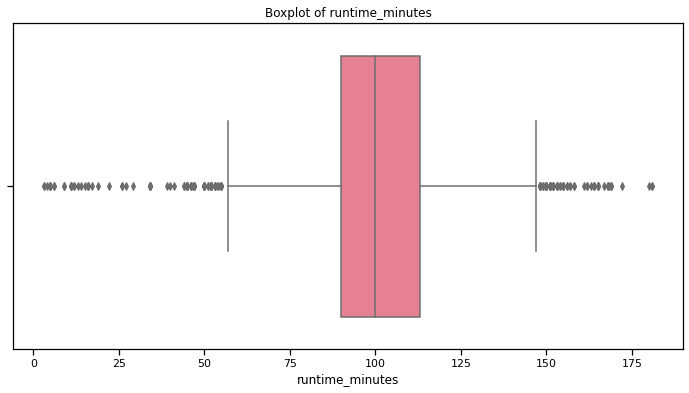

In [1191]:
#visualizing the distribution of runtime_minutes in our combined dataframe
col_data = combined_data.runtime_minutes
plt.figure(figsize=(12,6))
sns.boxplot(x=col_data)
plt.title('Boxplot of runtime_minutes');

In [1192]:
#The data appears to be near symmetric, with some outliers on both ends, we shall use mean imputation for this column
combined_data.runtime_minutes.fillna(combined_data.runtime_minutes.mean(), inplace=True)
#confirming if the operation was successful
missing_values(combined_data)

,index,Missing Values,Percentage
0,numvotes,443,0.141669
1,genres,84,0.026863


mean    7.731767e+04
std     1.362478e+05
min     5.000000e+00
max     1.841066e+06
Name: numvotes, dtype: float64


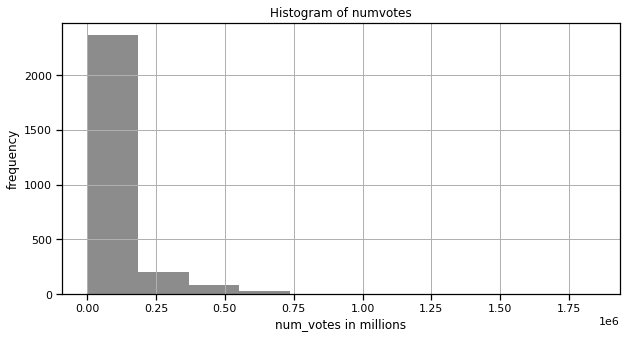

In [1193]:
#visualizing the distribution of numvotes
print(combined_data.numvotes.agg(['mean', 'std', 'min', 'max']))
combined_data.numvotes.hist(color='0.55', figsize=(10, 5))
plt.title("Histogram of numvotes")
plt.xlabel('num_votes in millions')
plt.ylabel('frequency');

In [1194]:
#The data in numvotes column is heavily skewed, so It would be 
# more appropriate to use median imputation
combined_data.numvotes.fillna(combined_data.numvotes.median(), inplace=True)

In [1195]:
missing_values(combined_data)

,index,Missing Values,Percentage
0,genres,84,0.026863


In [1196]:
#it's reasonable to assume that missing genre values may follow a common pattern, 
#Thus we can impute the missing values with the mode (most frequent genre) from the existing data. 
#This approach is simple and can be useful if there is a dominant genre in our dataset.

#Calling the value_counts method to find the mode genre
top_genre = combined_data.genres.value_counts().head(1)
print(f'The most common genre in our data is: {top_genre}');


The most common genre in our data is: Drama    323
Name: genres, dtype: int64


In [1197]:
#Performing Mode imputation
combined_data.genres.fillna(combined_data.genres.mode().iloc[0], inplace=True)

#confirming that we have no missing values in our dataset
#Calling our handy function
missing_values(combined_data)

,index,Missing Values,Percentage


In [1198]:
combined_data.dtypes

title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
original_title      object
release_year        object
dtype: object

In [1199]:
#A "Total Gross" column will allow us to directly analyze the total revenue generated by each movie. 
# This is important for understanding the overall financial success of the movies in our combined df

combined_data['total_gross'] = combined_data.domestic_gross + combined_data.foreign_gross

#Confirming the new column was added

combined_data.head(2)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,original_title,release_year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Toy Story 3,2010,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Inception,2010,8.283000e+08


In [1200]:
#The movie genres need to be split and exploded to allow for genre-specific analyses
combined_data.genres = combined_data.genres.str.split(',')
combined_data.head(5)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,original_title,release_year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218.0,Toy Story 3,2010,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0,Inception,2010,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532.0,Shrek Forever After,2010,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733.0,The Twilight Saga: Eclipse,2010,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690.0,Iron Man 2,2010,6.239000e+08


In [1201]:
#Exploding the genres
combined_data = combined_data.explode('genres')

In [1202]:
combined_data.head(5)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,original_title,release_year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218.0,Toy Story 3,2010,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Animation,8.3,682218.0,Toy Story 3,2010,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Comedy,8.3,682218.0,Toy Story 3,2010,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066.0,Inception,2010,8.283000e+08
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Adventure,8.8,1841066.0,Inception,2010,8.283000e+08


## Exploratory Data Analysis(EDA)

### Visualizations for key insights

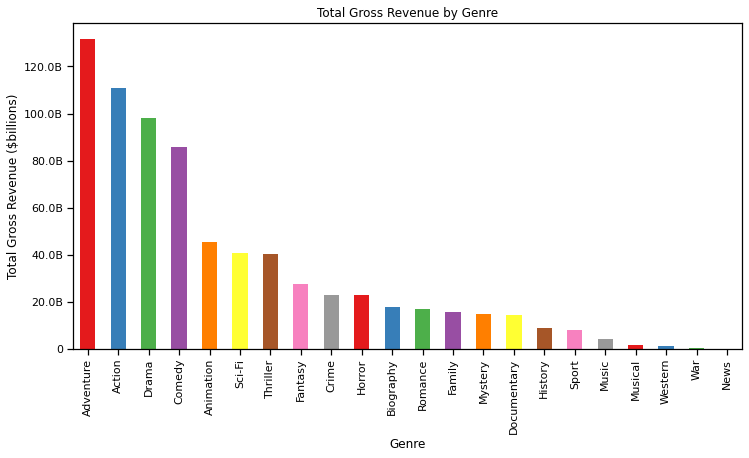

In [1203]:
# visualizing the best performing genres at the box office by grouping our df by 'genres'
grouped_data = combined_data.groupby('genres')['total_gross'].sum()

# Sort the results in descending order (highest total gross first)
sorted_data = grouped_data.sort_values(ascending=False)

# Create a figure and set the figure size
plt.figure(figsize=(12, 6))

# Function to format y-axis ticks (convert values to millions or billions)
def format_ticks(value, pos):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    else:
        return f'{value:.0f}'
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter
# Create a bar plot
# Apply the formatting to the y-axis ticks
y_formatter = FuncFormatter(format_ticks)
colors = sns.color_palette("Set1", n_colors=len(sorted_data))
ax = sorted_data.plot(kind='bar', color=colors)
ax.yaxis.set_major_formatter(y_formatter)

# Set plot title, labels, and x-axis rotation
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue ($billions)');



Observations:

Our analysis yields compelling observations regarding the performance of different genres at the Box Office. Notably, `Adventure, Action, Drama, Comedy,` and `Animation` genres emerge as the top-performing categories, consistently demonstrating strong historical performance. These genres have consistently commanded a substantial share of the total gross revenue, reflecting their enduring popularity among audiences.

Conversely, genres such as  `Music, Musical, Western, War, and News` exhibit a contrasting trend, historically underperforming in terms of total gross revenue. These genres have struggled to secure a significant share of the Box Office revenue, potentially indicating a narrower audience base or challenges in resonating with the broader movie-going population.



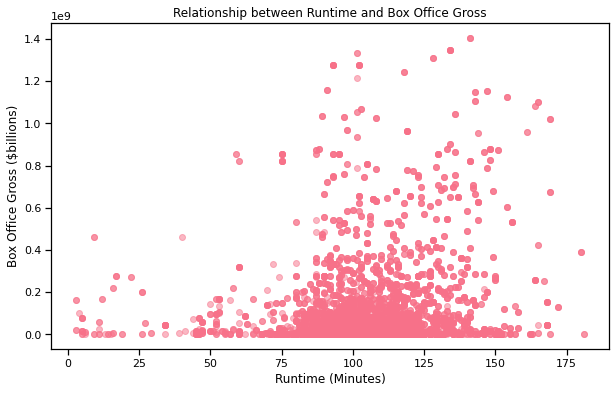

In [1204]:
# Creating a scatterplot to analyze the relationship between runtime and box office gross
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.runtime_minutes, combined_data.total_gross, alpha=0.5)
plt.title("Relationship between Runtime and Box Office Gross")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Box Office Gross ($billions)")
plt.show()

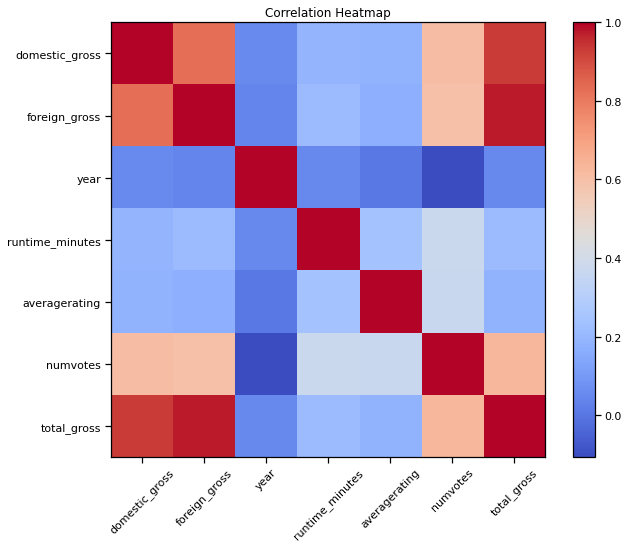

In [1205]:
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = combined_data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

Observation:

The correlation between runtime and total gross revenue at the Box Office is nearly negligible. In our analysis, we found that these two variables exhibit minimal association. This indicates that the duration of a movie has little to no impact on its commercial performance in terms of total gross revenue.

Such a weak correlation suggests that the runtime of a film is not a critical factor influencing its box office success. Instead, other elements such as the movie's content, genre, marketing, and viewer appeal likely exert a more significant influence on its financial performance. 

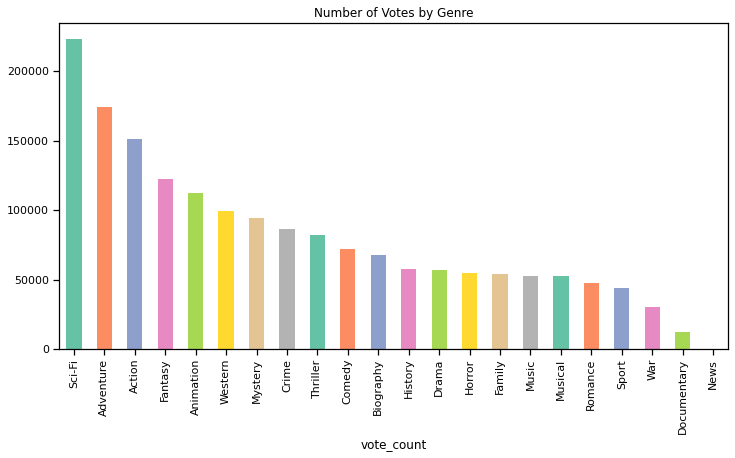

In [1206]:
#From the heatmap, there is an explicit correlation between numvotes and total_gross
#We will try find out which genres had the highest number of votes

# Visualizing the relationship between genres and average ratings
plt.figure(figsize=(12, 6))
genre_avg_votes = combined_data.groupby('genres')['numvotes'].mean()
sorted_data = genre_avg_votes.sort_values(ascending=False)
colors = sns.color_palette("Set2", n_colors=len(sorted_data))
sorted_data.plot(kind='bar', color=colors)
plt.title("Number of Votes by Genre")
plt.xlabel("vote_count");


Observation:

Through a comprehensive data analysis, augmented by a heatmap visualization, a compelling correlation is observed between two pivotal metrics within the dataset—namely, the number of votes (numvotes) and the total gross revenue (total_gross) attributed to films. Moreover, upon delving into the analysis of genre popularity, it is evident that specific genres command varying degrees of audience engagement.

In particular, it is discerned that genres such as `Sci-Fi, Adventure, Action, Fantasy,` and `Animation` exhibit a remarkable degree of popularity, characterized by a substantial number of votes. Conversely, genres including `Romance, Sport, War, Documentary`, and `News` are identified as comparatively less popular, with a notably lower level of audience interaction.

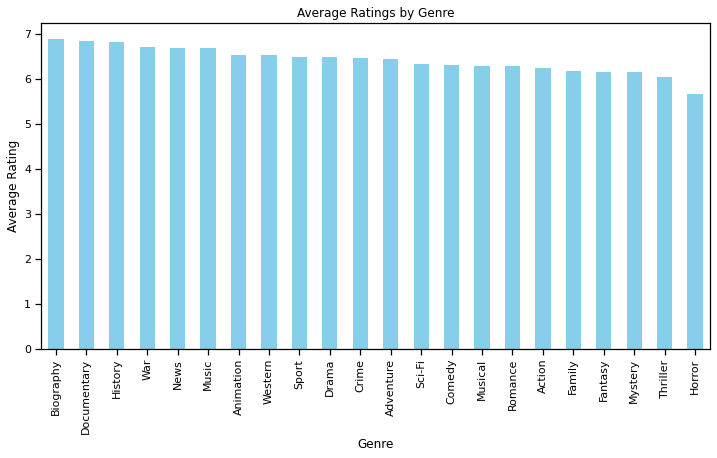

In [1207]:

# Visualizing the relationship between genre and average ratings
plt.figure(figsize=(12, 6))
genre_avg_ratings = combined_data.groupby('genres')['averagerating'].mean()
sorted_data = genre_avg_ratings.sort_values(ascending=False)
sorted_data.plot(kind='bar', color='skyblue')
plt.title("Average Ratings by Genre")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Rating");


Observation:

The presented bar graph underscores a limited dispersion in average ratings among the diverse genres under examination. Notably, the genres that achieved the highest ratings were found to be `Biography, Documentary, History`, and `War` films. Conversely, genres such as `Family, Mystery, Thriller,` and `Horror` registered as the least favorably rated categories.This could possibly infer that films based on real-life events/people or historical subjects have a tendency to be more highly rated by their audiences. However, it's essential to exercise caution when drawing broad conclusions from this data alone.

Several factors could contribute to the higher ratings of such films. For example, these genres often focus on real-life stories that are inherently compelling or emotionally resonant, which can positively influence audience perception. Additionally, the quality of storytelling, acting, and production values can significantly impact ratings, regardless of the genre.

''

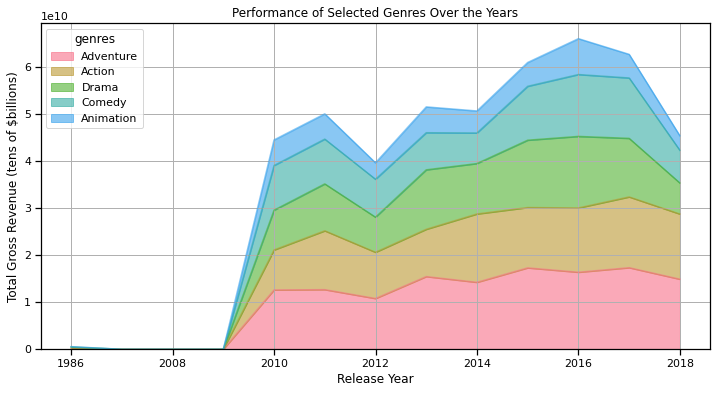

In [1208]:
#Analyzing genre performance over the years
genre_performance = combined_data.groupby(['release_year', 'genres'])['total_gross'].sum().reset_index()

# Pivoting the data
pivoted_data = genre_performance.pivot(index='release_year', columns='genres', values='total_gross')

# Customizing the list of genres we want to display(top 5)
grouped_data = combined_data.groupby('genres')['total_gross'].sum().sort_values(ascending=False)
top_5_genres = grouped_data.index[:5]

# Selecting data for the chosen genres
selected_data = pivoted_data[top_5_genres]

# Creating a stacked area chart
sns.set_palette("husl")  # Customize the color palette
selected_data.plot(kind='area', stacked=True, alpha=0.6, figsize= (12,6))
plt.title('Performance of Selected Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Gross Revenue (tens of $billions)')
plt.grid(True)
;

For starters, it is essential to contextualize the distinctive shape observed in the stacked area graph, which is a reflection of our movie analysis spanning across the years 1986 to 2018. Notably, this shape encompasses specific trends within the top five highest-grossing genres at the box office, namely: `Adventure, Action, Drama, Comedy,` and `Animation.`

In the year 2009, our analysis reveals a significant and simultaneous upturn in total gross revenue across all these top genres. This marked increase in total gross revenue could be attributed to various factors, including the release of highly anticipated blockbuster films within these genres, improved marketing and distribution strategies, or shifts in audience preferences.

Conversely, an intriguing deviation from this upward trend was observed in 2016, where there was a modest downturn in total gross revenue for all genres. This dip persisted until 2018, which coincides with the conclusion of our analysis period. Potential factors contributing to this temporary decline may include fluctuations in the film industry, competitive releases, or economic influences.

## Recommendations & Insights


`1. Content Strategy:`
- Diversify Genre Portfolio: Our analysis revealed that Adventure, Action, Drama, Comedy, and Animation genres have historically performed well at the Box Office. To maximize success, Microsoft's new movie studio should consider producing films in these genres. However, it is crucial to maintain a diverse genre portfolio to cater to a broader audience.

- Exploration of Untapped Genres: While the top-performing genres are essential for profitability, don't overlook niche genres. Genres like Music, Musical, Western, War, and News may not have performed well historically, but they might hold untapped potential. Microsoft should explore opportunities in these less competitive genres.

`2. Viewer Preferences:`

- Quality over Quantity: While certain genres may be highly rated by audiences, such as Biography, Documentary, History, and War, these genres often have a smaller market. It is crucial to prioritize quality over quantity in such cases, aiming for well-crafted films that resonate with their target audience.

- Market Research: To tailor content to audience preferences, conduct market research to understand the evolving tastes of moviegoers. Staying attuned to viewer preferences is essential for producing successful films.

`3. Runtime Considerations:`

- Runtime Flexibility: Given the weak correlation between runtime and total gross revenue, Microsoft should recognize that the duration of a film may not significantly impact its Box Office success. Filmmakers have the flexibility to focus on storytelling and content rather than adhering to strict runtime constraints.

- Testing Audience Tolerance: While runtime may not be a critical factor, it's still advisable to consider audience tolerance for lengthy films. Conduct test screenings and gather feedback to find the optimal balance between storytelling and audience engagement.

`4. Continuous Monitoring:`
- Stay Agile: The film industry is dynamic, and audience preferences can change rapidly. Microsoft should employ an agile approach, adapting its content strategy based on evolving trends, audience feedback, and market dynamics.

- Leverage Data Analytics: Continue to use data analytics to monitor the performance of movies, genres, and other relevant factors. Regularly evaluate box office data to fine-tune strategies and make data-driven decisions.

## Conclusions

In conclusion, the analysis conducted in this project provides valuable insights and recommendations for Microsoft's foray into the film industry. By examining historical box office data and viewer preferences, we've identified specific genres that have historically performed well, such as Adventure, Action, Drama, Comedy, and Animation. These genres can serve as a strong foundation for Microsoft's content strategy, offering the potential for Box Office success. However, we also recognize the importance of diversifying into less competitive genres, such as Music, Musical, Western, War, and News, where untapped opportunities may lie.

Furthermore, our analysis underscores the significance of quality over quantity, emphasizing the need to prioritize well-crafted films in genres that resonate with their respective target audiences. While viewer preferences play a vital role in a film's success, it's also important to note that the correlation between runtime and total gross revenue is relatively weak. This implies that filmmakers have flexibility in storytelling and can focus on content without rigidly adhering to runtime constraints.

As with any analysis, there are limitations to consider. The film industry is subject to rapidly changing trends and viewer preferences, making it challenging to predict future success with certainty. Additionally, the dataset's missing values and historical context may not fully capture the nuances of the modern film landscape. To address these limitations and continue improving this project, future steps may include conducting more extensive market research, leveraging real-time data sources, and remaining agile in adapting to evolving industry trends.

In summary, this project equips Microsoft's new movie studio with valuable insights for a successful entry into the competitive world of film production. By following our recommendations, staying attuned to audience preferences, and remaining adaptable in a dynamic industry, Microsoft can strategically position itself for a prosperous future in filmmaking.
***